In [2]:
import sys
import artm
import itertools

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from tqdm import tqdm

sys.path.append('../src')
from topic_modeling import *

In [3]:
batches_path = '../data/interim/batches'

dictionary = artm.Dictionary()
dictionary.gather(data_path=batches_path)

batch_vectorizer = artm.BatchVectorizer(data_path=batches_path, data_format='batches')

articles = pd.read_csv('../data/interim/articles_preproc.csv')
labels_true = articles[['id', 'hr_level_0']]

In [4]:
def metrics_visualisation(scores, figsize):
    
    fig, axes = plt.subplots(3, 2, figsize=figsize)
    
    for index, (score_name, model_scores) in enumerate(scores.items()):
        
        i = index % 3
        j = index % 2
        
        model_scores = pd.DataFrame(model_scores)
        
        x = model_scores.index.values
        
        for model_name in model_scores.columns:
            
            y = model_scores.loc[:, model_name]
            axes[i, j].plot(x, y, label=model_name)
            
        axes[i, j].set_ylabel(score_name)
        axes[i, j].legend()
    
    fig.tight_layout()

per:1.0; loc:0.0; org:0.0; title:0.0; text:1.0


100%|██████████| 50/50 [01:13<00:00,  1.48s/it]


per:0.0; loc:1.0; org:0.0; title:0.0; text:1.0


100%|██████████| 50/50 [01:14<00:00,  1.47s/it]


per:0.0; loc:0.0; org:1.0; title:0.0; text:1.0


100%|██████████| 50/50 [01:14<00:00,  1.51s/it]


per:0.0; loc:0.0; org:0.0; title:1.0; text:1.0


100%|██████████| 50/50 [01:14<00:00,  1.49s/it]


per:0.0; loc:0.0; org:0.0; title:0.0; text:1.0


100%|██████████| 50/50 [01:13<00:00,  1.46s/it]


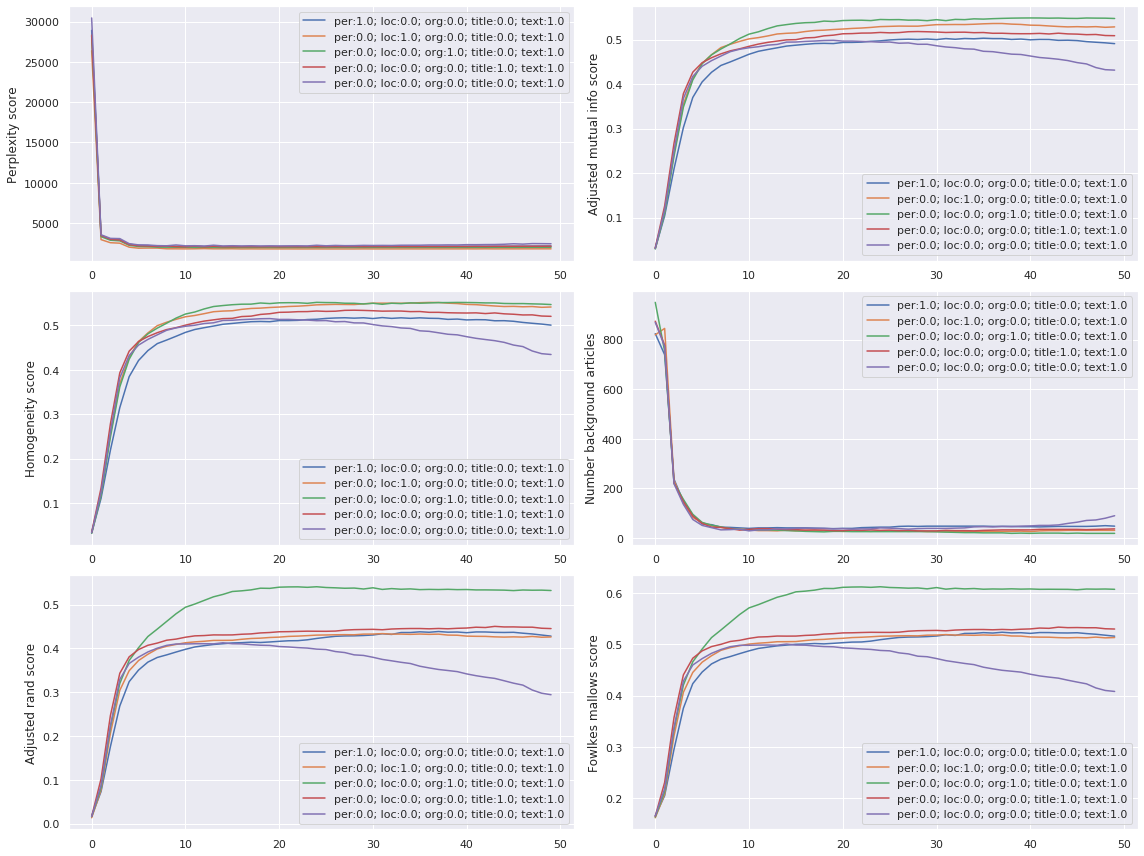

In [11]:
num_topics = 9
num_collection_passes = 50

scores = {'Perplexity score': {},
          'Number background articles': {},
          'Adjusted rand score': {},
          'Adjusted mutual info score': {},
          'Homogeneity score': {}, 
          'Fowlkes mallows score': {}}

modalities = ['per', 'loc', 'org', 'title', 'text']

variants = np.eye(len(modalities))
variants[:-1, -1] = variants[:-1, -1]+np.ones(len(modalities)-1)

class_ids_variants = [dict(zip(modalities, weights)) for weights in variants]
class_ids_variants

for class_ids in class_ids_variants:
    
    model_name = '; '.join([f'{key}:{value}' for key, value in class_ids.items()])
    print(model_name)
    
    topic_model = TopicModeling(dictionary, class_ids=class_ids,
                                num_topics=num_topics, num_collection_passes=1,
                                smooth_background_tau=1, sparse_phi_tau=0, decorrelator_phi_tau=0.1)
    
    for epoch in tqdm(range(num_collection_passes)):

        labels_pred = topic_model.fit_predict(batch_vectorizer)

        n_background_articles = len(get_background_articles(articles, labels_pred))
        if (n_background_articles == len(articles)): break

        scores['Number background articles'].setdefault(model_name, [])
        scores['Number background articles'][model_name].append(n_background_articles)

        perplexity_score = topic_model.model.score_tracker['perplexity'].last_value

        scores['Perplexity score'].setdefault(model_name, [])
        scores['Perplexity score'][model_name].append(perplexity_score)

        adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, fowlkes_mallows_score = get_metrics(labels_true, labels_pred)

        scores['Adjusted rand score'].setdefault(model_name, [])
        scores['Adjusted rand score'][model_name].append(adjusted_rand_score)

        scores['Adjusted mutual info score'].setdefault(model_name, [])
        scores['Adjusted mutual info score'][model_name].append(adjusted_mutual_info_score)

        scores['Homogeneity score'].setdefault(model_name, [])
        scores['Homogeneity score'][model_name].append(homogeneity_score)

        scores['Fowlkes mallows score'].setdefault(model_name, [])
        scores['Fowlkes mallows score'][model_name].append(fowlkes_mallows_score)
        
metrics_visualisation(scores, figsize=(16, 12))
plt.show()

per:0; loc:0; org:1; title:0; text:1


100%|██████████| 50/50 [01:14<00:00,  1.51s/it]


per:1; loc:0; org:1; title:0; text:1


100%|██████████| 50/50 [01:14<00:00,  1.53s/it]


per:0; loc:1; org:1; title:0; text:1


100%|██████████| 50/50 [01:14<00:00,  1.53s/it]


per:0; loc:0; org:1; title:1; text:1


100%|██████████| 50/50 [01:14<00:00,  1.52s/it]


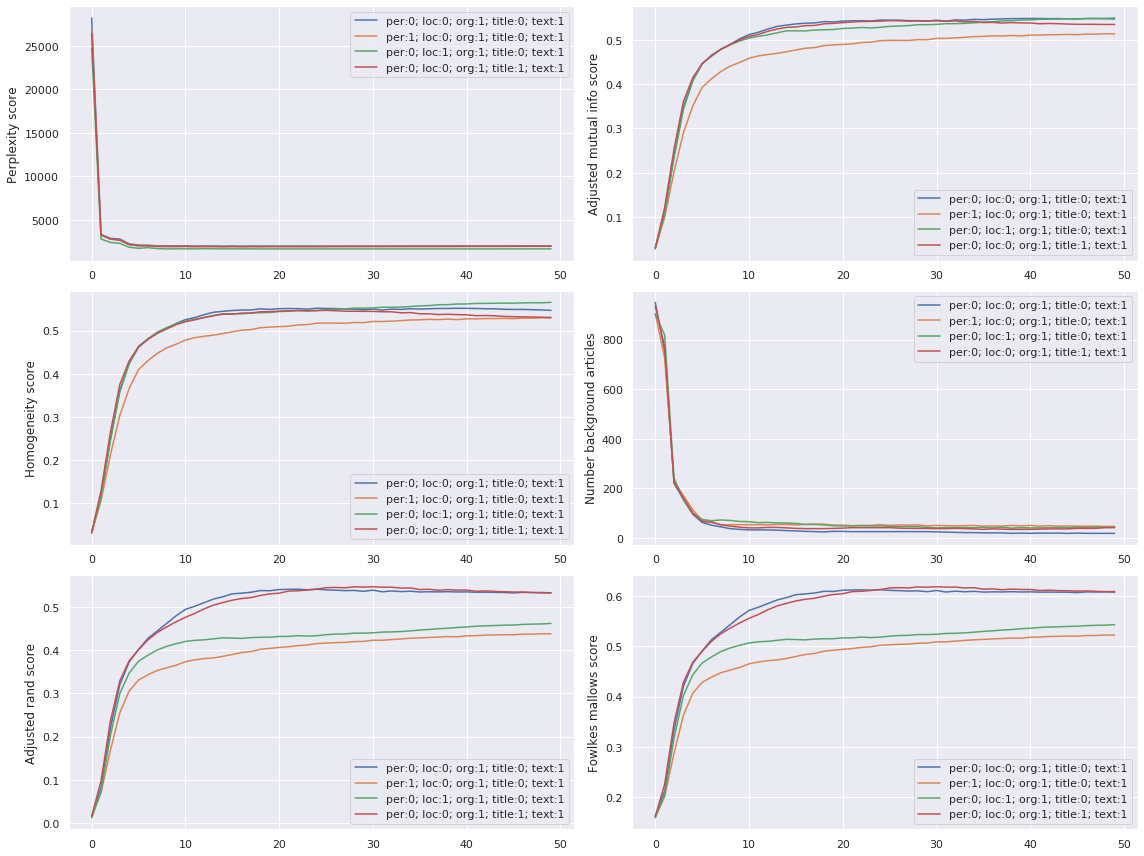

In [12]:
num_topics = 9
num_collection_passes = 50

scores = {'Perplexity score': {},
          'Number background articles': {},
          'Adjusted rand score': {},
          'Adjusted mutual info score': {},
          'Homogeneity score': {}, 
          'Fowlkes mallows score': {}}

modalities = ['per', 'loc', 'org', 'title', 'text']

variants = [[0, 0, 1, 0, 1], [1, 0, 1, 0, 1], [0, 1, 1, 0, 1], [0, 0, 1, 1, 1]]

class_ids_variants = [dict(zip(modalities, weights)) for weights in variants]
class_ids_variants

for class_ids in class_ids_variants:
    
    model_name = '; '.join([f'{key}:{value}' for key, value in class_ids.items()])
    print(model_name)
    
    topic_model = TopicModeling(dictionary, class_ids=class_ids,
                                num_topics=num_topics, num_collection_passes=1,
                                smooth_background_tau=1, sparse_phi_tau=0, decorrelator_phi_tau=0.1)
    
    for epoch in tqdm(range(num_collection_passes)):

        labels_pred = topic_model.fit_predict(batch_vectorizer)

        n_background_articles = len(get_background_articles(articles, labels_pred))
        if (n_background_articles == len(articles)): break

        scores['Number background articles'].setdefault(model_name, [])
        scores['Number background articles'][model_name].append(n_background_articles)

        perplexity_score = topic_model.model.score_tracker['perplexity'].last_value

        scores['Perplexity score'].setdefault(model_name, [])
        scores['Perplexity score'][model_name].append(perplexity_score)

        adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, fowlkes_mallows_score = get_metrics(labels_true, labels_pred)

        scores['Adjusted rand score'].setdefault(model_name, [])
        scores['Adjusted rand score'][model_name].append(adjusted_rand_score)

        scores['Adjusted mutual info score'].setdefault(model_name, [])
        scores['Adjusted mutual info score'][model_name].append(adjusted_mutual_info_score)

        scores['Homogeneity score'].setdefault(model_name, [])
        scores['Homogeneity score'][model_name].append(homogeneity_score)

        scores['Fowlkes mallows score'].setdefault(model_name, [])
        scores['Fowlkes mallows score'][model_name].append(fowlkes_mallows_score)
        
metrics_visualisation(scores, figsize=(16, 12))
plt.show()

In [13]:
topic_model = TopicModeling(dictionary, class_ids={'per':0, 'loc':0, 'org':1, 'title':0, 'text':1},
                            num_topics=9, num_collection_passes=50,
                            smooth_background_tau=1, sparse_phi_tau=0, decorrelator_phi_tau=0.1)

labels_pred = topic_model.fit_predict(batch_vectorizer)

for topic_name, org_top_tokens in topic_model.model.score_tracker['org_top_tokens'].last_tokens.items():
    
    print(topic_name.upper())
    print('ORG: '+', '.join(org_top_tokens))
    
    text_top_tokens = topic_model.model.score_tracker['text_top_tokens'].last_tokens[topic_name]
    print('TEXT: '+', '.join(text_top_tokens))
    
    topic_labels_pred = labels_pred[labels_pred == topic_name]
    print(f'TOPIC SIZE: {len(topic_labels_pred)}')
    
    topic_ids = topic_labels_pred.index.astype(int)
    corresponding_topics = articles[articles.id.isin(topic_ids)].groupby('hr_level_0').id.count().sort_values(ascending=False)
    print(f'CORRESPONDING TOPIC: {corresponding_topics.index[0]}')
    print('; '.join([f'{name} - {value}' for name, value in zip(corresponding_topics.index, corresponding_topics.values)]))
    
    print()

TOPIC_0
ORG: фацебоокий, газпром, нафтогаз, стокгольмский_арбитраж, цамбридг_аналытица, рвсна, северный_флот, еврокомиссия, кс, орацль, вмф, вдв, норд_стре_2_ага, ооо_смешарик, аль-каида, ростёха, укртрансгаз, арбитражный_суд, бёлтый, федеральный_ведомство_по_судоходство_и_гидрография, бсх, россия, тоф, балтийский_флот, стокгольмский_арбитражный_суд, сф, нафтогазук, нафтогаз_українь, арт_пицтуреснуть_студио, ека, норд_стре_2, тихоокеанский_флот, пулково, нак_нафтогаз, европарламент, цво, чф, черноморский_флот, конституционный_суд, одинс_еые_ентертаинмент, федеральный_ведомство, федеральный_служба_по_военный-технический_сотрудничество, артпицтурес, юнеско, тульский_соединение, аир_малта, еулеx, федеральный_суд, дом_народный_собрание, спч, норд_стре_ага, тагильский_ракетный_соединение, минтранс, гтс, тихоокеанский_флот_(тоф), канцелярия_по_дело, нафтогаз_украина, нак_нафтогаз_украина, балтфлот, смешарик, норд_стре, днат, бсх), белый_фойе, атэс, пао_укртрансгаз, горный_ведомство, каспийск